# Residual move-out auto-tracking and seismic section flattening by using NRM displacement. {-}

## 1. Before we start, we set the default setting and the plotting parameters. (Python version 3.7, OBSPY version 1.2.1 ) {-}

### 1.1 Import preliminary libraries, set the default setting, and import the dataset (synthetic section, NRM field). {-}

In [1]:
import scipy.ndimage
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from obspy.io.segy.segy import _read_segy
from matplotlib import collections
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.style
import matplotlib as mpl
from scipy import interpolate
from scipy.signal import savgol_filter

#################################STYLE#############################

mpl.style.use('default')
mpl.rcParams['font.size'] = 6
mpl.rcParams['lines.linewidth'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['lines.markersize'] = np.sqrt(0.5)
mpl.rcParams['scatter.marker'] = "v"
#matplotlib.rcParams['text.usetex'] = True

######################DEFINE PATH AND MAIN OBJECTS##############
ip1 = _read_segy(r'./inputdata_withavo/3D_SYN_OG_SO190_313_41.sgy', headonly=True)        # synthetic seismic section
#ip1 = _read_segy(r'./inputdata_withavo/3D_SYN_OG_SO190_313_BUNCH.sgy', headonly=True)     # synthetic seismic section
#ip1 = _read_segy(r'./inputdata_withavo/3D_SYN_OG_SO190_313_BUNCH_V5.sgy', headonly=True)     # synthetic seismic section

ip2 = _read_segy(r'./inputdata_withavo/3D_DISPLACE_SO190_313_OPS.sgy', headonly=True)     # NRM displacement field. Segy sample interval: 2 m. Number of traces: 250.
#ip2 = _read_segy(r'./inputdata_withavo/3D_DISPLACE_SO190_313_BUNCH.sgy', headonly=True)     # NRM displacement field. Segy sample interval: 2 m. Number of traces: 250.
#ip2 = _read_segy(r'./inputdata_withavo/3D_DISPLACE_SO190_313_BUNCH_V5.sgy', headonly=True)     # NRM displacement field. Segy sample interval: 2 m. Number of traces: 250.

#ip2 = _read_segy(r'./inputdata_withavo/3D_DISPLACE_DIP_SO190_313_.sgy', headonly=True)     # NRM displacement field. Segy sample interval: 2 m. Number of traces: 250.

trace_length = 2500      # we interpolate the synthetic seismic section and the NRM field ten times in order to avoid the aliasing in further calculation.
nrm_tracelength = 250    # 250 is the original number of traces in the NRM field.
dt = 2e-3
y = np.linspace(0.,trace_length,trace_length) 
multiplier_nrm = 0.5 * trace_length / nrm_tracelength  # the 0.5 multiplier here is due to NRM's 2m sample rate. 


ip1_stk = np.delete(np.stack(t.data for t in ip1.traces), 0 , 1) # the first row of the zero row is deleted
ip1_seis = scipy.signal.resample(ip1_stk,trace_length,axis=1).T  # resample the data ten times in depth domain.

new_index = np.arange(0,trace_length)
old_index = np.arange(0,nrm_tracelength) * trace_length / nrm_tracelength     
ip2_stk = np.delete(np.stack(t.data for t in ip2.traces), 0 , 1) 
fun_interp = interpolate.interp1d(old_index, ip2_stk, kind='linear', fill_value='extrapolate') # define the function to interpolate the NRM field ten times.
ip2_seis = multiplier_nrm * fun_interp(new_index).T


C:\Users\yxia\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3254: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


### 1.2 Set up the optmization parameters for matplotlib sub plotting (annotation, label, title, text boxes, etc).  {-}

In [2]:
def fig_opt():

    ########################OFFSET_AXE_TWINY###################################
    ax1_off = ax1.twiny()      #TWIN THE X AXE As offsetdomain
    ax2_off = ax2.twiny()      #TWIN THE X AXE As offsetdomain
    ax3_off = ax3.twiny()      #TWIN THE X AXE As offsetdomain
    ax4_off = ax4.twiny()      #TWIN THE X AXE As offsetdomain
    ax5_off = ax5.twiny()      #TWIN THE X AXE As offsetdomain
    ax6_off = ax6.twiny()      #TWIN THE X AXE As offsetdomain

    oldticks = ax1.get_xticks()
    newticks = []
    
    for X in oldticks:
        newticks.append(X * 0.1)

    ax1_off.set_xticks(oldticks)
    ax1_off.set_xbound(ax1.get_xbound())
    ax1_off.set_xticklabels(newticks)

    ax2_off.set_xticks(oldticks)
    ax2_off.set_xbound(ax1.get_xbound())
    ax2_off.set_xticklabels(newticks)

    ax3_off.set_xticks(oldticks)
    ax3_off.set_xbound(ax1.get_xbound())
    ax3_off.set_xticklabels(newticks)

    ax4_off.set_xticks(oldticks)
    ax4_off.set_xbound(ax1.get_xbound())
    ax4_off.set_xticklabels(newticks)
    
    ax5_off.set_xticks(oldticks)
    ax5_off.set_xbound(ax1.get_xbound())
    ax5_off.set_xticklabels(newticks)

    ax6_off.set_xticks(oldticks)
    ax6_off.set_xbound(ax1.get_xbound())
    ax6_off.set_xticklabels(newticks)

    ax3_off.set_xticklabels([]) #set the twin axe lable to nothing
    ax4_off.set_xticklabels([]) #set the twin axe lable to nothing

    ax5_off.set_xticklabels([]) #set the twin axe lable to nothing
    ax6_off.set_xticklabels([]) #set the twin axe lable to nothing
    
    ax1.set_ylabel('Depth [km]')
    ax3.set_ylabel('Depth [km]')
    ax5.set_ylabel('Depth [km]')


    ax1_off.set_xlabel('Offset [km]')
    ax2_off.set_xlabel('Offset [km]')
    #ax3_off.set_xlabel('Offset [km]')
    #ax4_off.set_xlabel('Offset [km]')


    ax5.set_xlabel('Trace Number')
    ax6.set_xlabel('Trace Number')

    #################### Y axis MOD ''''''''''''''''''''''''''
    oldyticks = ax1.get_yticks()

    newyticks = []
    for X in oldyticks:
        newyticks.append(X * 0.001 * 0.2 + 3)

    ax1.set_yticks(oldyticks)
    ax1.set_ybound(ax1.get_ybound())
    ax1.set_yticklabels(newyticks)
    ax1.yaxis.tick_left()
    ax1.yaxis.set_ticks_position("both")
    
    ax2.set_yticks(oldyticks)
    ax2.set_ybound(ax2.get_ybound())
    ax2.set_yticklabels(newyticks)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_ticks_position("both")
    
    ax3.set_yticks(oldyticks)
    ax3.set_ybound(ax3.get_ybound())
    ax3.set_yticklabels(newyticks)
    ax3.yaxis.tick_left()
    ax3.yaxis.set_ticks_position("both")
    
    ax4.set_yticks(oldyticks)
    ax4.set_ybound(ax4.get_ybound())
    ax4.set_yticklabels(newyticks)
    ax4.yaxis.tick_right()
    ax4.yaxis.set_ticks_position("both")
    
    ax5.set_yticks(oldyticks)
    ax5.set_ybound(ax4.get_ybound())
    ax5.set_yticklabels(newyticks)
    ax5.yaxis.tick_left()
    ax5.yaxis.set_ticks_position("both")
    
    ax6.set_yticks(oldyticks)
    ax6.set_ybound(ax4.get_ybound())
    ax6.set_yticklabels(newyticks)
    ax6.yaxis.tick_right()
    ax6.yaxis.set_ticks_position("both")
    
    ax2.yaxis.set_label_position('right')
    ax4.yaxis.set_label_position('right')
    ax6.yaxis.set_label_position('right')

    ax2.set_ylabel('Depth [km]')
    ax4.set_ylabel('Depth [km]')
    ax6.set_ylabel('Depth [km]')
    
    ax1.set_xticklabels([])

    ax2.set_xticklabels([])
    
    ax3.set_xticklabels([])

    ax4.set_xticklabels([])




### 1.3 Set up the optmization parameters for matplotlib single plotting (annotation, label, title, text boxes, etc). {-}

In [3]:
def fig_opt_single(title_text, title_font_size):

    ########################OFFSET_AXE_TWINY###################################
    ax1_off = ax1.twiny()      #TWIN THE X AXE As offsetdomain

    oldticks = ax1.get_xticks()

    newticks = []
    for X in oldticks:
        newticks.append(X * 0.1)

    ax1_off.set_xticks(oldticks)
    ax1_off.set_xbound(ax1.get_xbound())
    ax1_off.set_xticklabels(newticks)

    ax1.set_ylabel('Depth [km]')

    ax1_off.set_xlabel('Offset [km]')
    ax1.set_xlabel('Trace Number')
    ax1.set_ylim(trace_length, 0)
    ax1.set_title(title_text, fontsize = title_font_size)

    #################### Y axis MOD ''''''''''''''''''''''''''
    oldyticks = ax1.get_yticks()

    newyticks = []
    for X in oldyticks:
        newyticks.append(X * 0.001 * 0.2 + 3)

    ax1.set_yticks(oldyticks)
    ax1.set_ybound(ax1.get_ybound())
    ax1.set_yticklabels(newyticks)

### 1.4 Define the function to plot the figure with "blue white red" palatte. {-}

In [4]:
############################## PLOT QC Color #############################
def plot_qc_bwr(input_data, axs_num, textbox, colorbar_textbox, output_name, cb_position):
    
    vm = np.percentile(input_data, 100)
    #fig,(axs_num) = plt.subplots(1, sharey='all', sharex='all')
    
    disimage = axs_num.imshow(input_data, cmap="bwr", vmin=-vm, vmax=vm, aspect="auto")
    axs_num.set_xlim(-0.5,40.5)
    t3 = axs_num.text(0.03,0.93, textbox, transform=axs_num.transAxes)
    t3.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))
    
    cbaxes = fig.add_axes(cb_position) 
    cb = plt.colorbar(disimage, cax = cbaxes, label=colorbar_textbox)
    plt.savefig(output_name, dpi=100)
    
    return 'QC color'

### 1.5 Define the function to plot the figure with wiggles. {-}

In [5]:
########################### PLOT WIGGLE QC ###############################
def plot_qc_wiggle(input_data, axs_num, text_box, output_name, trace_length):
    offsets = np.linspace(0,40,41,dtype=float)
    y = np.linspace(0.,trace_length - 1.,trace_length) 
    #fig,(axs_num) = plt.subplots(1, sharey='all', sharex='all')

    for offset in offsets:
        one_trace_2 = input_data[:,int(offset)]
    
        ampl_2 = offset + one_trace_2*0.00006
        axs_num.plot(ampl_2,y,'k-')
    
        axs_num.fill_betweenx(y,offset,ampl_2,where=(ampl_2>offset),color='k',linewidth=0.1)
        axs_num.set_ylim(trace_length,0)
        axs_num.set_xlim(-0.5,40.5)
    
    text_info = text_box  # print the parameter on the figure for testing.
    
    t3 = axs_num.text(0.03,0.93,text_info, transform=axs_num.transAxes)
    t3.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))
    plt.savefig(output_name, dpi=100)

    return 'wiggle plot exec'

## 2. RMO automatic calculation, seismic synthetic section flattening by using NRM displacement field. {-}

### 2.1 Plot the original synthetic section in wiggles.  {-}

Text(0.5, 0.01, 'Figure SS1. Synthetic seismic section with bunch reflectors')

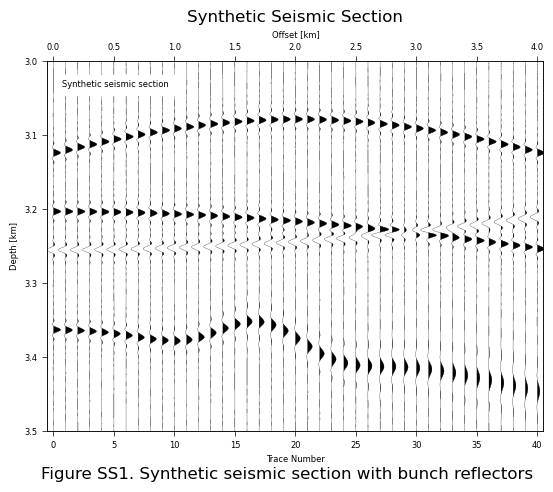

In [6]:
fig,(ax1) = plt.subplots(1, sharey='all', sharex='all')
plot_qc_wiggle(ip1_seis, ax1, 'Synthetic seismic section', 'Seismic_syn_origin.pdf', trace_length)
fig_opt_single('Synthetic Seismic Section', 12)

plt.figtext(0.5, 0.01, "Figure SS1. Synthetic seismic section with bunch reflectors", wrap=True, horizontalalignment='center', fontsize=12)


### 2.2 Smooth the NRM field by using the Savitzky-Golay filter.  {-}

In [7]:
 def nrm_sg_smooth(length, poly):
    
    numberoftraces = np.arange(0,41)[ : : -1]    # it is an array of [41, 40, 39, 38, 37, 36 ........ 0]
    ip2_seis_smooth = np.zeros((trace_length,41), float)
    
    for trace in numberoftraces:
        
        ip2_seis_tmp = savgol_filter(ip2_seis[:,trace], length, poly, mode='nearest', axis = 0) 
        ip2_seis_smooth[:,trace] = ip2_seis_tmp
    return ip2_seis_smooth

length = 401 # define the window length of the S-G filter.
poly = 6     # define the polynominal order of the S-G filter.
ip2_seis_smooth = nrm_sg_smooth(length, poly)

Text(0.5, 0.01, 'Figure SS2. NRM displacement field calculated from Figure SS1.')

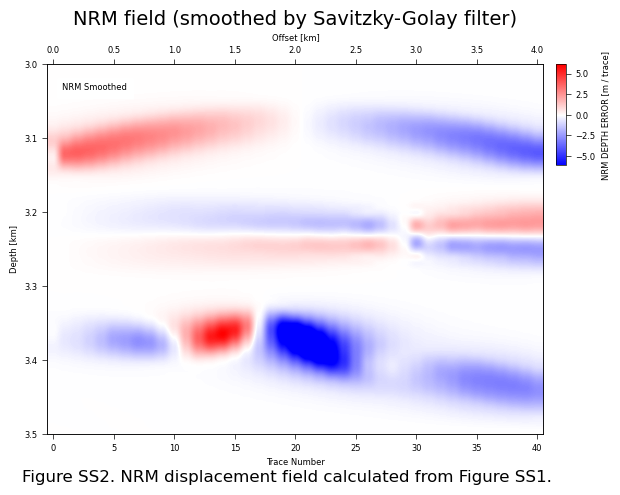

In [8]:
fig,(ax1) = plt.subplots(1, sharey='all', sharex='all')
plot_qc_bwr(ip2_seis_smooth / multiplier_nrm, ax1, 'NRM Smoothed','NRM DEPTH ERROR [m / trace]', 'NRM_smooth.pdf', [0.92, 0.67, 0.015, 0.21])
fig_opt_single('NRM field (smoothed by Savitzky-Golay filter)', 14)
plt.figtext(0.5, 0.01, "Figure SS2. NRM displacement field calculated from Figure SS1.", wrap=True, horizontalalignment='center', fontsize=12)


### 2.3 Correct the depth error of the seismic trace by using the relative NRM displacement field. {-}

### Since the NRM field contains the full information of the relative depth variant shifts of the seismic events, the NRM field can be used to flatten the input seismic section, which has several advantages for the depth error calculation and as a quality control of the validity of the displacement field.  {-}

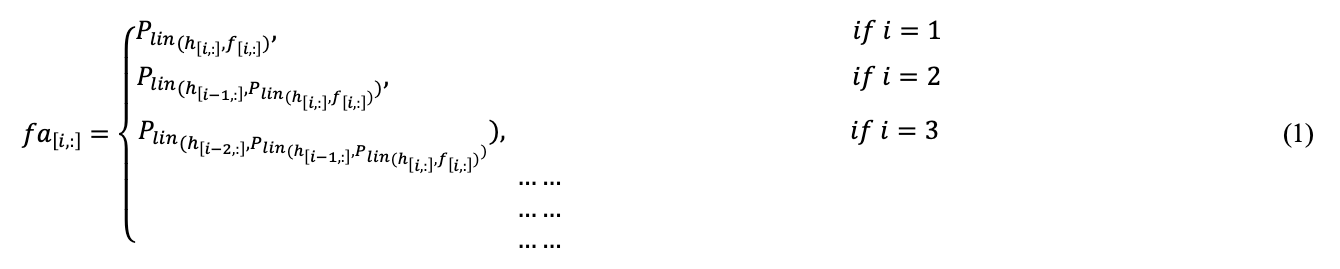

### where $f_{[i,:]}$ is the original synthetic seismic trace array at the ith trace, $h_{[i,:]}$ represents the NRM displacement field at the ith trace, the index i represents the actual trace number index of the dataset ($i\in{1,2,3,4,…… }$), and the function P_lin represents an irregular linear interpolation function. The function $P_{lin}$ for any corrected sample $fa_{[i,j]}$ could be expressed as in Eq. (2):  {-}

$$
fa_{[i,j]} = P_{lin}(h_{[i,:]}, f_{[i,j]}) = f_{[i,j]} + (f_{[i,n]} - f_{[i,m]}) / (n-m) * (j-m) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \    (2)
$$

### where the $m$ and $n$ are the closest irregular (non-integer) index to $j$ in the depth corrected index array $r_{[:]}$  by the NRM field for any given seismic trace$f_{[i,:]}$. Since the $h_{[i,j]}$  is a real number, the intermediate NRM-corrected index array $r_{[:]}$  does not have to be an integer. Thus, the array $ r_{[:]}$  could be simply expressed as:

$$
r_{[:]} = [1 - h_{[i,1]},  2 - h_{[i,2]}, 3 - h_{[i,3]}, 4 - h_{[i,4]}, 4 - h_{[i,4]}, ... ... ] \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \    (3)
$$

### where the $h_{[i,:]}$  represent the NRM displacement field at the ith trace. By applying the Eq. (1-3), one could readily get the flattened synthetic seismic section $fa_{[:,:]}$  (Fig. 2c). The following script describe the math application of the the equation (1-3) to achive an aligned section by using displacement field. 

In [9]:
def flat_syn_by_relative_nrm(dataset_toflat, nrm_input):                          # define your input data. 

    some_traces = np.empty((trace_length, 0), float)  # define an empty array in here
    maxi_trace = np.arange(0,41)             # define the maximum trace number in here.
    
    for trace_index in maxi_trace:            # start to loop to shift each trace
    
        ns = np.arange(0,trace_index + 1)[ : :-1]       # define the maximum number of correcting, which is the exact number of the trace number
        seis_trace_2d = dataset_toflat[:,trace_index][:, np.newaxis] # you select the trace, and add a dimention in here for the later interpolation. now it is 2d. 
        
        for n in ns:                                             # now you start to shift once for a trace. 
            nrm_dis_trace_2d = nrm_input[:,n][:, np.newaxis]       # now you select the NRM trace before starting the flattening
            seq_2d = np.arange(1, trace_length + 1, dtype=float)[:, np.newaxis]  # now you define an arraw as a index of the trace
            correction_2d = nrm_dis_trace_2d * 1 + seq_2d         # now you shift the index by the NRM field
            correction_1d = np.squeeze(correction_2d)       # you decrease the dimension in here because the interpolation works on 1d array
            seis_trace_1d = np.squeeze(seis_trace_2d)       # you decrease the dimension in here because the interpolation works on 1d array
            seq_1d = np.squeeze(seq_2d)                     # you decrase the dimention. 
        
            fun_interp = interpolate.interp1d(correction_1d, seis_trace_1d,kind='linear', fill_value='extrapolate')     # now you define the interpolation to shift the samples (500 samples)
            seis_trace_2d = fun_interp(seq_1d)[:, np.newaxis]    # now you subtract the new traces which is shifted, and incrase the dimenion to 2d again. 
        
        some_traces = np.append(some_traces, seis_trace_2d, axis=1) # now you put a finished flattened trace into your destination array.
    
    return some_traces    # return the whole gather (41 traces)



### Execute the above function to calculated the flattened seismic section, or the NRM displacement field itself.

In [10]:
flat_syn_rel =  flat_syn_by_relative_nrm(ip1_seis, ip2_seis_smooth)
flat_nrm_rel =  flat_syn_by_relative_nrm(ip2_seis_smooth, ip2_seis_smooth)

In [11]:
cumsum_flat_nrm = np.cumsum(flat_nrm_rel,axis=1) 

Text(0.5, 0.01, 'Figure SS3. Corrected seismic section by using relative scheme with NRM displacement field (Fig SS2)')

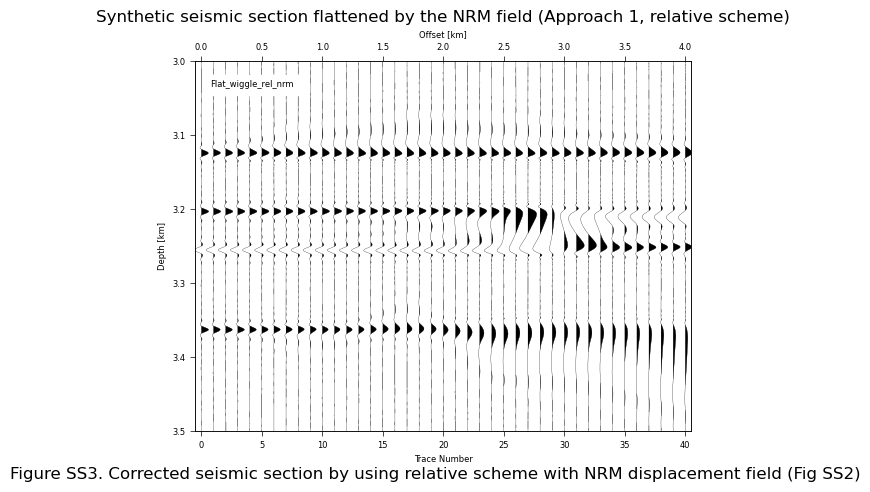

In [12]:
fig,(ax1) = plt.subplots(1, sharey='all', sharex='all')
plot_qc_wiggle(flat_syn_rel, ax1, 'Flat_wiggle_rel_nrm', 'Flat_wiggle_rel_nrm.pdf', trace_length)
fig_opt_single('Synthetic seismic section flattened by the NRM field (Approach 1, relative scheme)', 12)

plt.figtext(0.5, 0.01, "Figure SS3. Corrected seismic section by using relative scheme with NRM displacement field (Fig SS2)", wrap=True, horizontalalignment='center', fontsize=12)


Text(0.5, 0.01, 'Figure SS3-2. FLATTENED NRM displacement field calculated from the raw (relative) NRM field (Fig SS2.)')

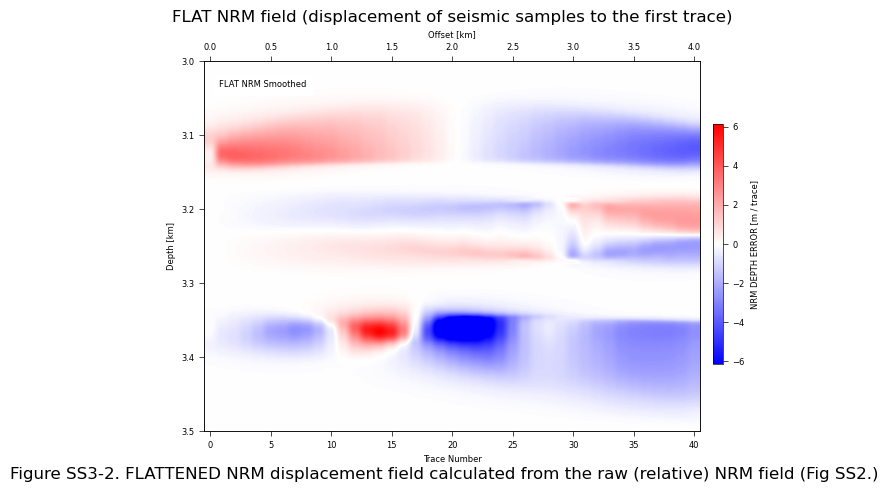

In [13]:
fig,(ax1) = plt.subplots(1, sharey='all', sharex='all')
plot_qc_bwr(flat_nrm_rel / multiplier_nrm, ax1, 'FLAT NRM Smoothed','NRM DEPTH ERROR [m / trace]', 'FLAT_NRM_smooth.pdf', [0.92, 0.25, 0.015, 0.5])
fig_opt_single('FLAT NRM field (displacement of seismic samples to the first trace)', 12)

plt.figtext(0.5, 0.01, "Figure SS3-2. FLATTENED NRM displacement field calculated from the raw (relative) NRM field (Fig SS2.)", wrap=True, horizontalalignment='center', fontsize=12)


### calculate the cumulative summation of the flattened NRM field, which would be used for further RMO auto-tracking.

In [14]:
cumsum_flat_nrm = np.cumsum(flat_nrm_rel,axis=1) 

Text(0.5, 0.01, 'Figure SS3-X. CUMSUM FLATTENED NRM displacement field calculated from the raw (relative) NRM field (Fig SS2.)')

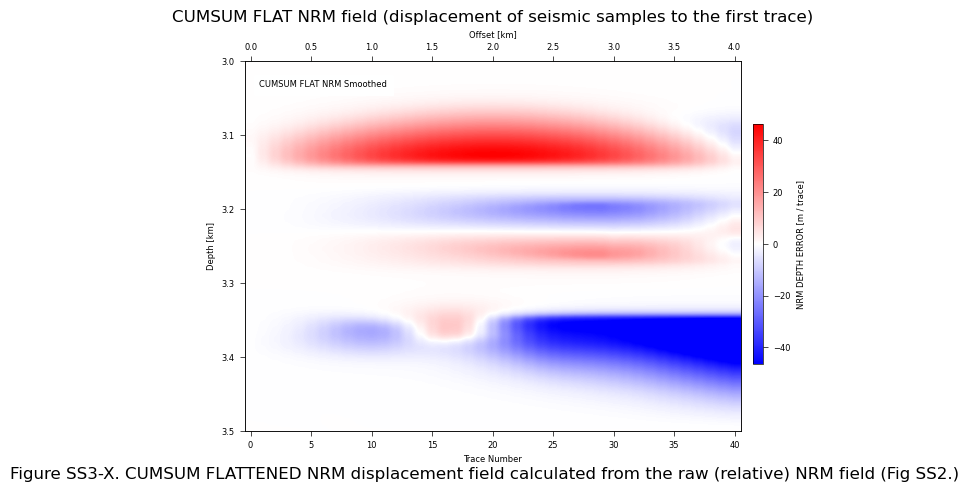

In [15]:
fig,(ax1) = plt.subplots(1, sharey='all', sharex='all')
plot_qc_bwr(cumsum_flat_nrm / multiplier_nrm, ax1, 'CUMSUM FLAT NRM Smoothed','NRM DEPTH ERROR [m / trace]', 'CUMSUM_FLAT_NRM_smooth.pdf', [0.92, 0.25, 0.015, 0.5])
fig_opt_single('CUMSUM FLAT NRM field (displacement of seismic samples to the first trace)', 12)

plt.figtext(0.5, 0.01, "Figure SS3-X. CUMSUM FLATTENED NRM displacement field calculated from the raw (relative) NRM field (Fig SS2.)", wrap=True, horizontalalignment='center', fontsize=12)

### 2.4 Semblance calcution{-}

### With the help of the flattened seismic section, one could retreive the starting depth of the RMO tracking by scanning the semblance on the seismic depth slice. The script below calculate the semblance by using the equation {-}

$$ s_{(j)} = (\sum_{i=1}^{n} f_{(i,j)})^{2} / \sum_{i=1}^{n} f_{(i,j)}^{2} /n $$

### where $n$ is the maximum number of traces, $s_{(j)}$ represents the semblance value, $f_{(i,j)}$ represent the seismic section. The script function below shows how to implete the equation above into a Python script.  {-}

In [16]:
def semblance_calc(input_seis):

    number_of_trace = 41
    number_of_index = np.arange(0, trace_length)
    all_semblance = np.zeros(trace_length)
    
    for index_num in number_of_index:
        
        cut_seis = input_seis[:,:number_of_trace]
        slice_syn = cut_seis[index_num,:]
        each_semblance =  sum(slice_syn) * sum(slice_syn)  / (sum(i*i for i in slice_syn)) / number_of_trace
        all_semblance[index_num] = each_semblance
        all_semblance_smooth = savgol_filter(all_semblance, 401, 6, mode='nearest', axis = 0)
        all_semblance_smooth[all_semblance_smooth < 0] = 0
        
    #return all_semblance_smooth
    return all_semblance, all_semblance_smooth, cut_seis

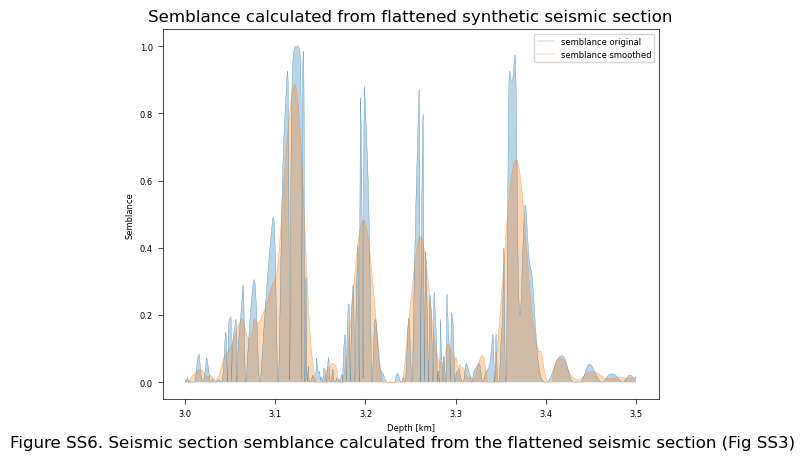

In [17]:
(all_semb, all_semb_smooth, cut_seis) = semblance_calc(flat_syn_rel)
ones_semb = np.linspace(3,3.5,trace_length)

plt.plot(ones_semb, all_semb, label='semblance original')
plt.fill_between(ones_semb, all_semb, 0, alpha=0.30)
plt.plot(ones_semb, all_semb_smooth, label='semblance smoothed')
plt.fill_between(ones_semb, all_semb_smooth, 0, alpha=0.30)
plt.xlabel('Depth [km]')
plt.ylabel('Semblance')
plt.title('Semblance calculated from flattened synthetic seismic section', fontsize=12)

plt.figtext(0.5, 0.01, "Figure SS6. Seismic section semblance calculated from the flattened seismic section (Fig SS3)", wrap=True, horizontalalignment='center', fontsize=12)

plt.legend()
plt.show()

#plt.imshow(cut_seis, interpolation='none', aspect=0.01 )



In [18]:
def plot_semblance(location_para):
    semb_axs = fig.add_axes(location_para)
    semb_axs.fill_between(all_semb_smooth, ones_semb, 0, alpha=0.30)
    semb_axs.plot(all_semb_smooth, ones_semb)
    
    #x_values = np.ones((trace_length,1), float) * 0.5                            # disable this if no bunch grid pick
    #semb_axs.plot(x_values, ones_semb,  linestyle="--")                          # disable this if no bunch grid pick
    
    counters = np.arange(0,500,12) # pure grid based picking, start 0, end 480, interval 10 meters.
    new_counters = counters                  # define the new counters to do the 
    #print(counters)
    
    for counter in counters:
        if all_semb_smooth[counter*5] < 0.5:
            new_counters = new_counters[new_counters != counter]
    #print(counters)
    #print(new_counters)
            
    new2_counters = new_counters * 0.001 + 3
    x1_values = np.ones(new2_counters.size, float) * 0.5
    
    print(new_counters)
    print(x1_values)
    ##########################################################
    counters = np.arange(0,x1_values.size)   # plot the scatter marker in this block
    print(counters)
    plt.gca().set_prop_cycle(None)    # reset the color cycle in here.

    #for counter in counters:                                                     # disable this if no bunch grid grid pick
    #        semb_axs.scatter(x1_values[counter],new2_counters[counter])          # disable this if no bunch grid grid pick
    #########################################################

    #semb_axs.scatter(x1_values,new2_counters)
    
    semb_axs.set_ylim(3.5,3.0)
    semb_axs.set_xlim(-0.2,1)
    semb_axs.set(xlabel='Semblance', ylabel='Depth [km]')

    return

In [19]:
#fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
#plot_qc_wiggle(ip1_seis, ax1, '(a) Synthetic Section', 'Flat_wiggle_abs_nrm.pdf', trace_length)

#plot_semblance([0.03, 0.11, 0.05, 0.35])
#fig_opt()
#plt.savefig('Figure222.pdf', dpi=300, format='pdf', bbox_inches='tight')

### The depth of the flattened synthetic seismic semblance peak values (from the figure above) represent the approximated depth of the seismic events (Table below). In real situations, the exact starting depth of the RMO tracking should be searched by a grid-based manner, guided by the semblance data. In this simply synthetic test, we manually read the peak amplitude of the seismic events from the first trace of the original synthetic seismic section for simplification. The semblance-weighted grid-based tracking scheme is documented in the "complex synthetic example" in this repository. {-}

| Event No. | Seismic peak amplitude depth (km) | Semblance peak depth (original) (km) | Semblance peak depth (smoothed) (km) |
| --- | --- | --- | --- |
| Event 1. (Blue) | 3.126 | 3.120 | 3.124 | 
| Event 2. (Orange) | 3.204 | 3.198 | 3.194 |
| Event 3. (Green) | 3.254 | 3.261 | 3.259 |
| Event 4. (Red) | 3.364 | 3.366 | 3.359 |

### 2.5 Now we define the function to calculate the RMO of the synthetic seismic gather based on the NRM field and the formula. Given a pre-defined starting pick $z_0$ at the nearest offset, the change of the residual reflector depth $Δz_{[:,z_0]}$, which is need for the reflection tomography, can be extracted along the flattened NRM displacement field $ha_{[:,:]}$ by calculating a cumulative summation $hc_{[:,:]}$ along the depth slide at depth $z_{0}$. 

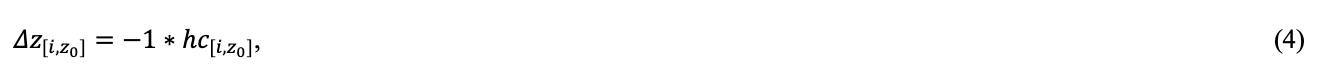

### where the array $Δz_{[:]}$ represents the depth error relative to reflector depth $z_0$, array $hc_{[:,:]}$ represents the depth-corrected cumulative-summed NRM displacement field, and the index i represents the trace number. For any trace $ha_{[i,:]}$ in Fig. 2d the cumulative summed NRM field $hc_{[:,:]}$ in Fig. 2f can be calculated by:

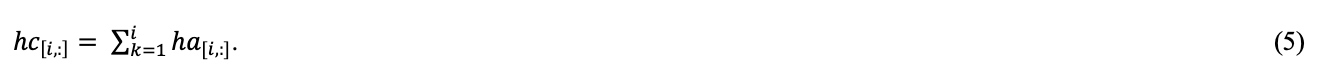

### The array $ha_{[i,:]}$ represent the ith flattened NRM trace. With the knowledge of the residual reflector depth $Δz_{[i,z_0]}$, one could readily get the RMO of any reflector in a seismic gather: 

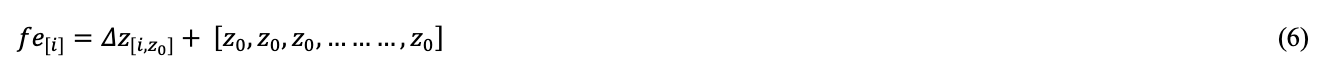

### where array $fe_{[:]}$  represents the absolute depth of an RMO sequence over the gather for a series of continuous reflectors. By applying the Eq. (4-6), and using the simple synthetic seismic (Fig. 2a), the four series of RMO picks illustrated in Fig. (2e) represent the auto-tracked RMO depth of the events. 

### The function below the utilization of the equations (4-6). 

In [20]:
def rmo_calc(start_time):
    matrix = ip2_seis.T * -1.00

    #####################first hori#############################
    ns = np.arange(0,41)
    starttime = start_time * multiplier_nrm
    # read from the segy of the synthetic that the peak amplitude of the first event in the first trace is the sample 126
    overall = np.array([])
    #y3 = np.arange(0,41)

    for n in ns:
        #starttime = np.squeeze(starttime) 
        disvalue = matrix[n, int(starttime)]
        starttime = disvalue + starttime
        overall = np.append (overall, [starttime])
        
    return overall

    #ax4.scatter(y3,overall,s=size,label=label_name)

In [21]:
def rmo_calc_cumsum(start_time):
    matrix = cumsum_flat_nrm 

    #####################first hori#############################
    ns = np.arange(0,41)
    #starttime = start_time * multiplier_nrm
    starttime = start_time * multiplier_nrm

    # read from the segy of the synthetic that the peak amplitude of the first event in the first trace is the sample 126
    overall = matrix[int(starttime),:] * -1 + starttime
    #y3 = np.arange(0,41)

    #for n in ns:
    #    #starttime = np.squeeze(starttime) 
    #    disvalue = matrix[n, int(starttime)]
    #    starttime = disvalue + starttime
    #    overall = np.append (overall, [starttime])
        
    return overall

    #ax4.scatter(y3,overall,s=size,label=label_name)

In [22]:
#rmo_calc_cumsum(126)

### Define the function to plot the RMO pickers. {-}

In [23]:
def plot_picker_nrm_predef(ax4, size, text_box):
    y3 = np.arange(0,41)
    
    #depth0_array = np.array([96, 96+12*1,96+12*2,96+12*3,96+12*4,96+12*5, ...and
    #                         186, 186+14*1,186+14*2,186+14*3,186+14*4, ...and
    #                         306, 306+14*1,306+14*2,306+14*3,])      # this is the bunch synthetic
    
    depth0_array = np.array([124, 204, 254, 364]) # this is for the four lines synthetic


    for depth_0 in depth0_array:
        pickers = rmo_calc_cumsum(depth_0)
        ax4.scatter(y3,pickers,s=size,label='RMO_Picker')
    
    ax4.set_ylim(2500,0)
    ax4.set_xlim(-0.5,40.5)

    #ax4.legend(fontsize=5, loc='lower left',frameon=False, ncol=2)

    t4 = ax4.text(0.03,0.93,text_box, transform=ax4.transAxes)
    t4.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))
    return

### Excute the function above to plot the RMO. {-}

Text(0.5, 0.01, 'Figure SS7. Residual Move-out (RMO) auto-tracked by using relative scheme')

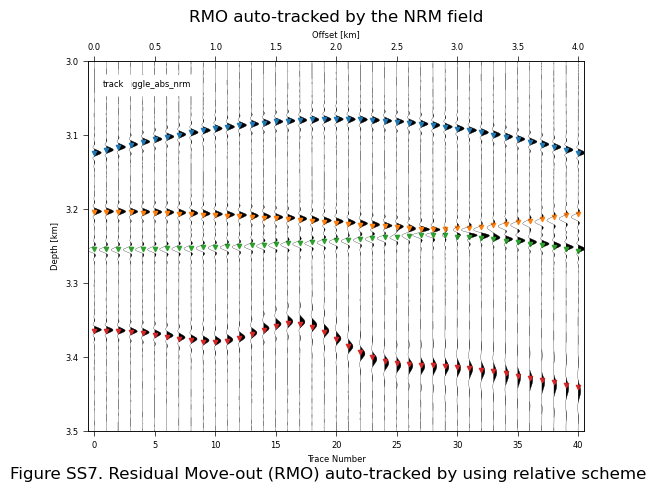

In [24]:
fig,(ax1) = plt.subplots(1, sharey='all', sharex='all')
plot_qc_wiggle(ip1_seis, ax1, 'Flat_wiggle_abs_nrm', 'Flat_wiggle_abs_nrm.pdf', trace_length)
#plot_picker_nrm_autogrid(ax1, 9, 0.5, 'Flat_wiggle_abs_nrm') # the variable defines the size of the marker (picker). 
plot_picker_nrm_predef(ax1, 9, 'track') # the variable defines the size of the marker (picker). 

fig_opt_single('RMO auto-tracked by the NRM field', 12)

plt.figtext(0.5, 0.01, "Figure SS7. Residual Move-out (RMO) auto-tracked by using relative scheme", wrap=True, horizontalalignment='center', fontsize=12)


## 3. Now we plot the Figure 2 in the manuscript, by executing previous functions. {-}


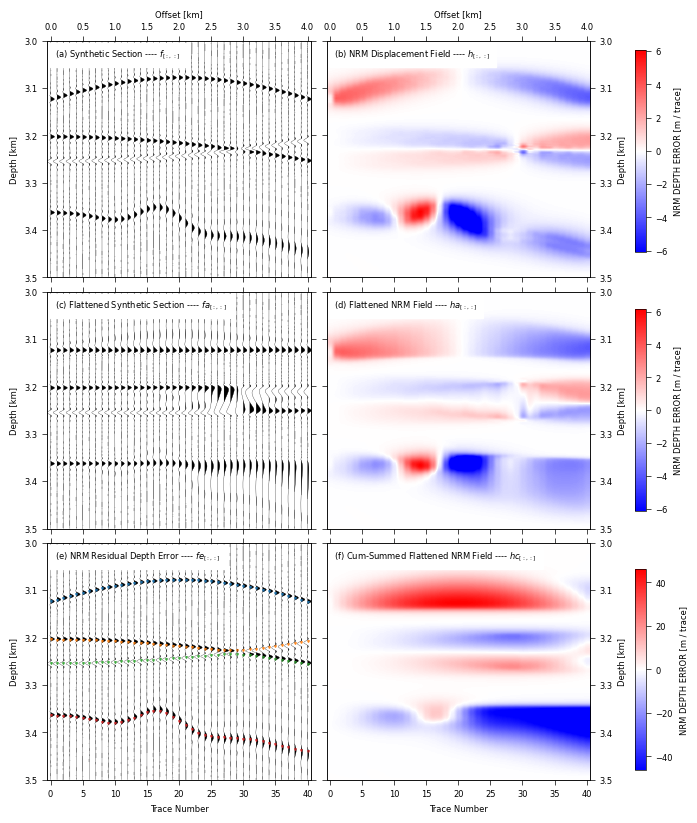

In [25]:
fig,((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
#plot_qc_wiggle(flat_syn_rel, ax3, 'Flat_wiggle_rel_nrm', 'Flat_wiggle_rel_nrm.pdf', trace_length)

plot_qc_wiggle(ip1_seis, ax1, r"(a) Synthetic Section ---- $f_{[:,:]}$", 'Flat_wiggle_abs_nrm.pdf', trace_length)
plot_qc_bwr(ip2_seis / multiplier_nrm, ax2, r"(b) NRM Displacement Field ---- $h_{[:,:]}$",'NRM DEPTH ERROR [m / trace]', 'NRM_smooth.pdf',[0.965, 0.66, 0.015, 0.21])

plot_qc_wiggle(flat_syn_rel, ax3, r"(c) Flattened Synthetic Section ---- $fa_{[:,:]}$", 'Flat_wiggle_abs_nrm.pdf', trace_length)

plot_qc_bwr(flat_nrm_rel / multiplier_nrm, ax4, r"(d) Flattened NRM Field ---- $ha_{[:,:]}$", 'NRM DEPTH ERROR [m / trace]', 'NRM_smooth.pdf',[0.965, 0.39, 0.015, 0.21])

plot_qc_bwr(cumsum_flat_nrm / multiplier_nrm, ax6, r"(f) Cum-Summed Flattened NRM Field ---- $hc_{[:,:]}$",'NRM DEPTH ERROR [m / trace]', 'NRM_smooth.pdf',[0.965, 0.12, 0.015, 0.21])
plot_qc_wiggle(ip1_seis, ax5, r"(e) NRM Residual Depth Error ---- $fe_{[:,:]}$", 'Flat_wiggle_abs_nrm.pdf', trace_length)
#plot_picker_nrm_autogrid(ax4, 0.8, 0.5, '(d) NRM Residual Depth Error') # the variable defines the size of the marker (picker). 
plot_picker_nrm_predef(ax5, 1, '') # the variable defines the size of the marker (picker). 
#plot_semblance([0.03, 0.11, 0.05, 0.35])

fig_opt()

fig.set_size_inches(7, 9.6)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=0.06)


#plt.figtext(0.5, -0.18, "Figure SS8. (a) Simulated complex geological situations that would be frequently seen in pre-stack depth migrated (PSDM) common-imagepoint (CIP) domain. A symmetrical diffraction, two interfering primaries with opposite polarity, and a non-linear local static undulation, including frequency versus offset signal variations. (b) The NRM displacement of gather (a) calculated from trace n to the previous trace (n-1) for n > 1. (c) Application of the displacement correction from (b) to the gather of (a). (d) Residual move-out picks calculated by 165 recursive summation of the relative depth errors (b) at predefined depths to get the cumulative depth error.. ", wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig('Figure-2.pdf', dpi=300, bbox_inches='tight')

# End of the iPython Notebook {-}
